In [ ]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist=keras.datasets.mnist #Datasets for handwritten digit classfication
(x_train,y_train),(x_test,y_test)=mnist.load_data() #Loading train and test sets
print(x_train.shape,y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [ ]:
#normalize 0,255--->0,1
x_train,x_test=x_train/255.0,x_test/255.0

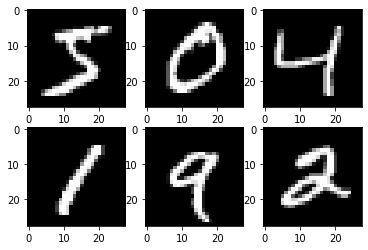

In [ ]:
#plotting the data
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(x_train[i],cmap='gray')
plt.show()

In [ ]:
#model
model=keras.models.Sequential([
                               keras.layers.Flatten(input_shape=(28,28)) ,#Reduces to 1D array
                               keras.layers.Dense(128,activation='relu'), #Creates a hidden layer with 128 hidden units and activation fn relu
                               keras.layers.Dense(10) #Output layer 
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Another way of defining model
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10))

In [ ]:
#Loss and optimizer
loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim=keras.optimizers.Adam(learning_rate=0.001)
metrics=["accuracy"]
model.compile(loss=loss,optimizer=optim,metrics=metrics)

In [ ]:
#Training
batch_size=64
epochs=5
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,shuffle=True,verbose=2) #verbose=2 means normal logging

Epoch 1/5
938/938 - 2s - loss: 1.4597 - accuracy: 0.6583
Epoch 2/5
938/938 - 2s - loss: 0.6199 - accuracy: 0.8465
Epoch 3/5
938/938 - 2s - loss: 0.4513 - accuracy: 0.8816
Epoch 4/5
938/938 - 2s - loss: 0.3860 - accuracy: 0.8940
Epoch 5/5
938/938 - 2s - loss: 0.3515 - accuracy: 0.9021


In [ ]:
#Evaluate 
model.evaluate(x_test,y_test,batch_size=batch_size,verbose=2)

157/157 - 0s - loss: 0.0761 - accuracy: 0.9764


[0.07610578089952469, 0.9764000177383423]

In [ ]:
#Predictions 
#we need softmax layer so creating new model
probability_model=keras.models.Sequential([
                                           model,
                                           keras.layers.Softmax()
])
predictions=probability_model(x_test)
pred0=predictions[0]
print(pred0)
label0=np.argmax(pred0)
print(label0)

tf.Tensor(
[8.6561286e-08 4.9716662e-09 1.0817402e-04 5.1026960e-04 1.0368880e-08
 6.5451428e-07 5.2052997e-11 9.9937820e-01 9.5350856e-07 1.5281030e-06], shape=(10,), dtype=float32)
7


In [ ]:
#model+softmax
predictions=model(x_test)
predictions=tf.nn.softmax(predictions)
pred0=predictions[0]
print(pred0)
label0=np.argmax(pred0)
print(label0)


tf.Tensor(
[8.6561286e-08 4.9716662e-09 1.0817402e-04 5.1026960e-04 1.0368880e-08
 6.5451428e-07 5.2052997e-11 9.9937820e-01 9.5350856e-07 1.5281030e-06], shape=(10,), dtype=float32)
7


In [ ]:
p5=predictions[0:5]
print(p5.shape)
l5=np.argmax(p5,axis=1)
print(l5)

(5, 10)
[7 2 1 0 4]


**Saving models**
```
1.save whole model
2.save only weights
3.save only architecture
```

In [ ]:
#Save whole model
#2 formats
#modelformat or HDF5
model.save("nn.h5")
model.save("neural_net")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: neural_net/assets


In [ ]:
new_model=keras.models.load_model('nn.h5')
print(new_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
